apache spark is an open source analytical processing engine for large scale powerful distributed data processing and machine learning applications

**spark:** default interface for scala and java

**pyspark:** pyhton interface for spark

**sparklyr:** r interface for spark

------

**features of apache spark:**

- in memory computation

- distributed processing using parallelize

- can be used with many cluster managers: spark yarn mesos

- fault tolerant

- immutable

- lazy evulation

- cache and persistence

- inbuild optimization when using dataframes

- supports ansi sql

----------

**master = driver**

**slaves = workers**

when you run a spark application

spark driver creates a context that is an entry point to your application

and all operations (transformations and actions) are executed on worker nodes

and the resources are managed by cluster manager

-----------

**cluster manager types:**

- standalone

- apache mesos

- hadoop yarn

- kubernetes

--------------

**spark modules:**

- spark core

- spark sql

- spark streaming

- spark mllib

- spark graphx

-------------

the master parameter for a spark context determines which cluster to use:

local:
- run spark locally with one worker thread
- no parallelism

local[k]:
- run spark locally with k worker threads
- ideally set to number of cores

spark://HOST:PORT:
- connect to a spark standalone cluster
- PORT depends on config (7077 by default)

mesos://HOST:PORT:
- connect to a mesos cluster
- PORT depends on config (5050 by default)

-------------

![Screenshot 2025-02-10 at 15.18.48 copy.png](<attachment:Screenshot 2025-02-10 at 15.18.48 copy.png>)
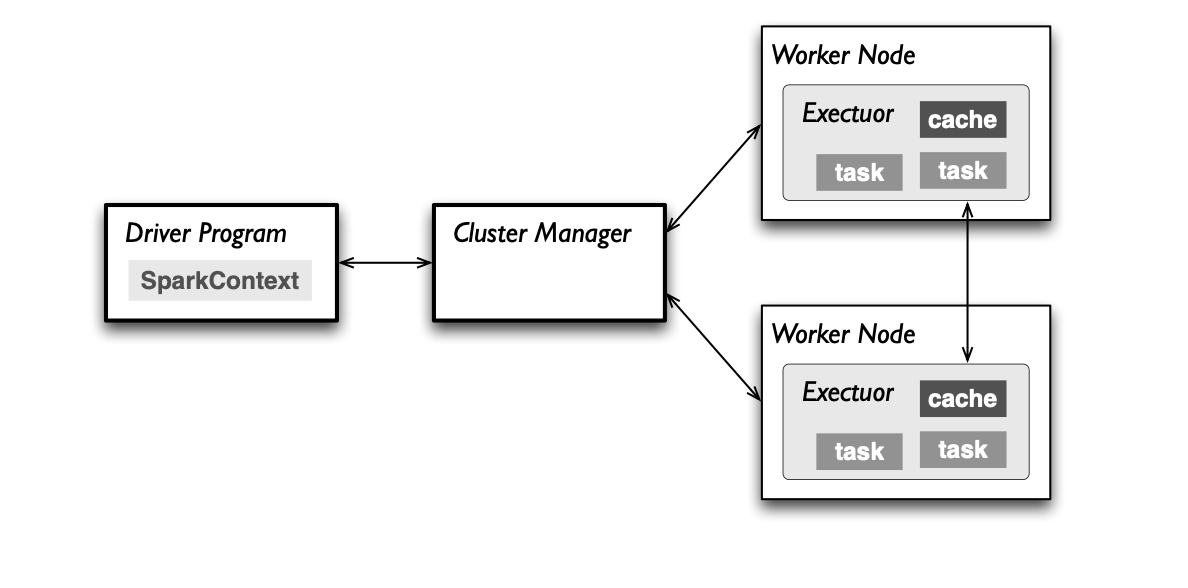

----------

**master:**

1- connects to a cluster manager which allocate resources across applications

2- acquires executors on cluster nodes to run computations and store data

3- sends app code to executors

4- sends tasks for the executors to run

----------

**rdd types:**

- parallelized collections:
take an existing scala collection and run functions on it in parallel

- hadoop datasets:
run functions on each record of a file in hadoop distributed file system or any storage system supported by hadoop

----------

**two types of operations on rdds:**

- transformations

- actions

---------

**spark supports:**

- text files
- sequence files
- hadoop input format
- directory
- glob

-------

In [1]:
# import libraries from pyspark 
from pyspark import SparkConf, SparkContext

# set values for spark configuration
conf = SparkConf().setMaster("local").setAppName("tutorial")

# get (if already running) or create a spark context
sc = SparkContext.getOrCreate(conf=conf)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/24 23:54:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/02/24 23:54:34 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# check (try) if spark context variable (sc) exists and print information about the spark context
try:
    sc
except NameError:
    print("please create spark context first (run cell above)")
else:
    configurations = sc.getConf().getAll()
    for item in configurations: print(item)

('spark.master', 'local')
('spark.app.submitTime', '1740430474009')
('spark.driver.port', '52297')
('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false')
('spark.

In [3]:
sc

<SparkContext master=local appName=tutorial>

In [4]:
data = [1, 2, 3, 4, 5]
distributedData = sc.parallelize(data)

In [5]:
data

[1, 2, 3, 4, 5]

In [6]:
distributedData

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

# creating rdds:

### the first way to create an rdd

### is to parallelize an python object

### meaning converting it to a distributed dataset that can be operated in parallel

In [8]:
# create a list of strings
stringList = ["spark is awesome","spark is cool"]

# convert list of strings into a spark rdd
string_rdd = sc.parallelize(stringList)

In [9]:
# output rdd information
string_rdd

ParallelCollectionRDD[2] at readRDDFromFile at PythonRDD.scala:289

one thing to notice is that you are not able to see the output

because of spark's lazy evaluation untill you call an action on that rdd

In [10]:
# retrieve all the elements of the rdd/dataFrame/dataset (from all nodes)
string_rdd.collect()

['spark is awesome', 'spark is cool']

.collect() is an action 

as it name suggests it collects all the rows from each of the partitions in an rdd 

and brings them over to the driver program

### the second way to create an RDD is 

### to read a dataset from a storage system which can be a 

### local computer file system

### hdfs 

### cassandra

### amazon s3

In [11]:
# read text file into rdd
ratings = sc.textFile("./ratings.dat")

In [12]:
# retrieve all the elements of the rdd/dataFrame/dataset (from all nodes) and output first 5 rows
ratings.collect()[:5]

['1::1193::5::978300760',
 '1::661::3::978302109',
 '1::914::3::978301968',
 '1::3408::4::978300275',
 '1::2355::5::978824291']

In [13]:
# take the first 5 elements of the rdd
ratings.take(5)

['1::1193::5::978300760',
 '1::661::3::978302109',
 '1::914::3::978301968',
 '1::3408::4::978300275',
 '1::2355::5::978824291']

# transformations:

- transformations are operations on rdds that return a new rdd

- transformations create a new dataset from an existing one

- all transformations in spark are lazy: 

they do not compute their results right away

instead they remember the transformations applied to some base dataset

## map transformation

return a new rdd by applying a function to each element of this rdd

In [14]:
# use the already created rdd and convert all letter to uppercase 

string_rdd_uppercase = string_rdd.map(lambda x: x.upper())

# implement the function 'alternate_char_upper' which converts every other letter to upper case
def alternate_char_upper(text):
    new_text= []
    for i, character in enumerate(text):
        if i % 2 == 0:
            new_text.append(character.upper())
        else:
            new_text.append(character)
    return ''.join(new_text)

string_rdd_alternate_uppercase= string_rdd.map(alternate_char_upper)

print(string_rdd.collect())
print(string_rdd_uppercase.collect())
print(string_rdd_alternate_uppercase.collect())

['spark is awesome', 'spark is cool']
['SPARK IS AWESOME', 'SPARK IS COOL']
['SpArK Is aWeSoMe', 'SpArK Is cOoL']


## flat map transformation

return a new rdd by first applying a function to all elements of this rdd and then flattening the results

In [15]:
# use the already created rdd and split the string at every ' ' character
# using the flatMap transformation and the split function
flatMap_Split= string_rdd.flatMap(lambda x: x.split(" "))

flatMap_Split.collect()

['spark', 'is', 'awesome', 'spark', 'is', 'cool']

## difference between map and flat map

since the source rdd contains two strings the map transformation returns two separate objects (each with separate strings)

the flat map transformation returns only one object with all separated strings from both input objects (strings)

In [16]:
print("split using map transformation:")

# use the already created rdd (stringRDD) and split the string at every ' ' character
# using the map transformation and the split function
map_Split= string_rdd.map(lambda x: x.split(" "))

print(map_Split.collect())

split using map transformation:
[['spark', 'is', 'awesome'], ['spark', 'is', 'cool']]


In [18]:
print("split using flatmap transformation:")

# use the already created rdd and split the string at every ' ' character
# using the flatMap transformation and the split function
flatMap_Split= string_rdd.flatMap(lambda x: x.split(" "))

print(flatMap_Split.collect())

split using flatmap transformation:
['spark', 'is', 'awesome', 'spark', 'is', 'cool']


## filter transformation

return a new rdd containing only the elements that satisfy a predicate

In [20]:
# filter all objects from rdd containing 'awesome'
awesomeLineRDD = string_rdd.filter(lambda x: "awesome" in x)
awesomeLineRDD.collect()

['spark is awesome']

In [21]:
# filter all objects from rdd containing 'spark'
sparkLineRDD = string_rdd.filter(lambda x: "spark" in x)
sparkLineRDD.collect()

['spark is awesome', 'spark is cool']

## union transformation

return a new rdd containing all items from two original rdds

In [22]:
# create two new rdds
rdd1 = sc.parallelize([1,2,3,4,5])
rdd2 = sc.parallelize([1,2,4,6,7,8])

# create a third rdd with 'union' transformation on rdd1 and rdd2
rdd3 = rdd1.union(rdd2)
rdd3.collect()

[1, 2, 3, 4, 5, 1, 2, 4, 6, 7, 8]

## intersection transformation

return the intersection of this rdd and another one

the output will not contain any duplicate elements even if the input rdds did

In [23]:
# create two new rdds
rdd1 = sc.parallelize([1,2,3,4,5])
rdd2 = sc.parallelize([1,2,4,6,7,8])

# create a third rdd with 'intersection' transformation on rdd1 and rdd2
rdd3 = rdd1.intersection(rdd2)
rdd3.collect()

[2, 4, 1]

## substract tranformation

return each value in self that is not contained in other (return a new dataframe containing rows in this DataFrame but not in another dataframe) 

this is equivalent to EXCEPT DISTINCT in sql

In [24]:
# create a new rdd 'words' use transformation flatMap and map ... all in one line
words = sc.parallelize(["the amazing thing about spark is that it is very simple to learn"]).flatMap(lambda x: x.split(" "))

# create a new rdd 'stopWords'
stopWords = sc.parallelize(["the", "it", "is", "to", "that", ''])

# use substract transformation on words rdd
realWords = words.subtract(stopWords)
realWords.collect()

['about', 'learn', 'amazing', 'thing', 'spark', 'very', 'simple']

## distinct transformation

return a new rdd containing distinct items from the original rdd

In [25]:
# create new rdd 'duplicateValueRDD'
duplicateValueRDD = sc.parallelize([1,1,2,2,3,3])

# use distinct transformation on rdd and collect action - in one line
duplicateValueRDD.distinct().collect()

[1, 2, 3]

## sample transformation

return a new rdd containing a statistical sample of the original rdd

In [26]:
# create a new rdd 'numbers'
# the second parameter of the parallelize transformation is optional integer value
# and defines the number of partitions the data would be parallelized to
numbers = sc.parallelize([1,2,3,4,5,6,7,8,9,10], 2)

# the transformation 'sample' returns a sampled subset of the numbers rdd
numbers.sample(True, 0.3).collect()

[3, 4, 7, 7]

## groupby transformation

group the data in the original rdd

In [27]:
#create pairs where the key is the output of a user function and the value is all items for which the function yields this key

# create a new rdd 'x'
x = sc.parallelize(['john', 'fred', 'anna', 'james'])

# groupBy all elements by the first letter of each element (which will be used as keys)
y = x.groupBy(lambda w: w[0])

# 'loop' through all element of the 'y' rdd and print the objects
print([(k, list(v)) for (k, v) in y.collect()])

[('j', ['john', 'james']), ('f', ['fred']), ('a', ['anna'])]


In [23]:
# create a new pair where the original key corresponds to this collected group of values

# create new 'x' rdd with key value pairs
x = sc.parallelize([('b',5),('b',4),('a',3),('a',2),('a',1)])

# create rdd 'y' using the groupBy transformation on the keys of rdd 'x'
y = x.groupByKey()

# print objects of RDD 'x'
print(x.collect())

# 'loop' through all element of the 'y' rdd and print the objects
print(list((j[0], list(j[1])) for j in y.collect()))

[('b', 5), ('b', 4), ('a', 3), ('a', 2), ('a', 1)]
[('b', [5, 4]), ('a', [3, 2, 1])]


## map partitions transformation

return a new rdd by applying a function to each partition of this rdd

In [28]:
# create new rdd with two partitions
x = sc.parallelize([1,2,3], 2)

# define the function 'f' - it is an iterable
# the function sums all values of a partition and returns the sum and the number 42 as an object
def f(iterator): yield sum(iterator); yield 42
    
# use the transformation 'mapPartitions' with the function 'f'
y = x.mapPartitions(f)

# glom() flattens elements on the same partition
print(x.collect())
print(y.collect())
print(x.glom().collect())
print(y.glom().collect())

[1, 2, 3]
[1, 42, 5, 42]
[[1], [2, 3]]
[[1, 42], [5, 42]]


## map partition with index transformation

return a new rdd by applying a function to each partition of this rdd 

while tracking the index of the original partition

In [29]:
# create new rdd with two partitions
x = sc.parallelize([1,2,3], 2)

# define the function 'f' - it is an iterable
# the function sums all values of a partition and returns the index of the original partition and the sum as an object
def f(partitionIndex, iterator): yield (partitionIndex, sum(iterator))
    
# use the transformation 'mapPartitions' with the function 'f'
y = x.mapPartitionsWithIndex(f)

# glom() flattens elements on the same partition
print(x.collect())
print(y.collect())
print(x.glom().collect())
print(y.glom().collect())

[1, 2, 3]
[(0, 1), (1, 5)]
[[1], [2, 3]]
[[(0, 1)], [(1, 5)]]


## join transformation

return a new rdd containing all pairs of elements having the same key in the original rdds

union(otherRDD,numPartitions=None)

In [30]:
# create rdd 'x'
x = sc.parallelize([("a", 1), ("b", 2)])

# create rdd 'y'
y = sc.parallelize([("a", 3), ("a", 4), ("b", 5)])

# create rdd 'z1' as a join result on keys from rdd 'x' and 'y'
z1 = x.join(y)
print(z1.collect())

# create rdd 'z2' as a join result on keys from rdd 'y' and 'x'
z2 = y.join(x)
print(z2.collect())

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]
[('b', (5, 2)), ('a', (3, 1)), ('a', (4, 1))]


## coalesce transformation

return a new rdd which is reduced to a smaller number of partitions

coalesce(numPartitions,shuffle=False)

In [31]:
# create a rdd with three partition
x = sc.parallelize([1, 2, 3, 4, 5], 3)

# reduce the number of partitions to two by using the coalesce transformation
y = x.coalesce(2)
print(x.glom().collect())
print(y.glom().collect())

[[1], [2, 3], [4, 5]]
[[1], [2, 3, 4, 5]]


## keyby transformation

create a pair rdd forming one pair for each item in the original rdd

the pair’s key is calculated from the value via a user-supplied function

In [32]:
# create a new rdd 'x'
x = sc.parallelize(['john', 'fred', 'anna', 'james'])

# use the first letter of each element as the key for the element
y = x.keyBy(lambda w: w[0])

print(x.collect())
print(y.collect())

['john', 'fred', 'anna', 'james']
[('j', 'john'), ('f', 'fred'), ('a', 'anna'), ('j', 'james')]


## partitionby transformation

return a new rdd with the specified number of partitions placing original items into the partition returned by a user supplied function

partitionBy(numPartitions,partitioner=portable_hash)

In [33]:
# create a rdd with three partition
x = sc.parallelize([('j','james'),('f','fred'),('a','anna'),('j','john')], 3)

# creta a new RDD 'y' with only two partitions and place each item in partition 0 if the first letter of the item is < 'h'
# the item will be placed in partition 1 otherwise 
y = x.partitionBy(2, lambda w: 0 if w[0] < 'h' else 1)

# glom() flattens elements on the same partition
print(x.glom().collect())
print(y.glom().collect())

[[('j', 'james')], [('f', 'fred')], [('a', 'anna'), ('j', 'john')]]
[[('f', 'fred'), ('a', 'anna')], [('j', 'james'), ('j', 'john')]]


## zip transformation

return a new rdd containing pairs whose key is the item in the original rdd and whose value is that item’s corresponding element (same partition same index) in a second rdd

In [34]:
# create rdd 'x'
x = sc.parallelize([1, 2, 3])

# create rdd 'y' using the transformation map on rdd 'x'
y = x.map(lambda n:n*n)

# create rdd 'z' using the transformation zip on rdds 'x' and 'y'
z = x.zip(y)
print(x.collect())
print(y.collect())
print(z.collect())

[1, 2, 3]
[1, 4, 9]
[(1, 1), (2, 4), (3, 9)]


# stop the spark session

In [35]:
try:
    sc
except NameError:
    print("spark context does not context exist - nothing to stop")
else:
    sc.stop()